# K Means exemple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## Data

In [6]:
# Charger le dataset Iris
iris = load_iris()
X = iris.data  # Caractéristiques (longueur et largeur des sépales et pétales)
y = iris.target  # Étiquettes (catégorie de fleur)

feature_names = iris.feature_names

### Visualisation

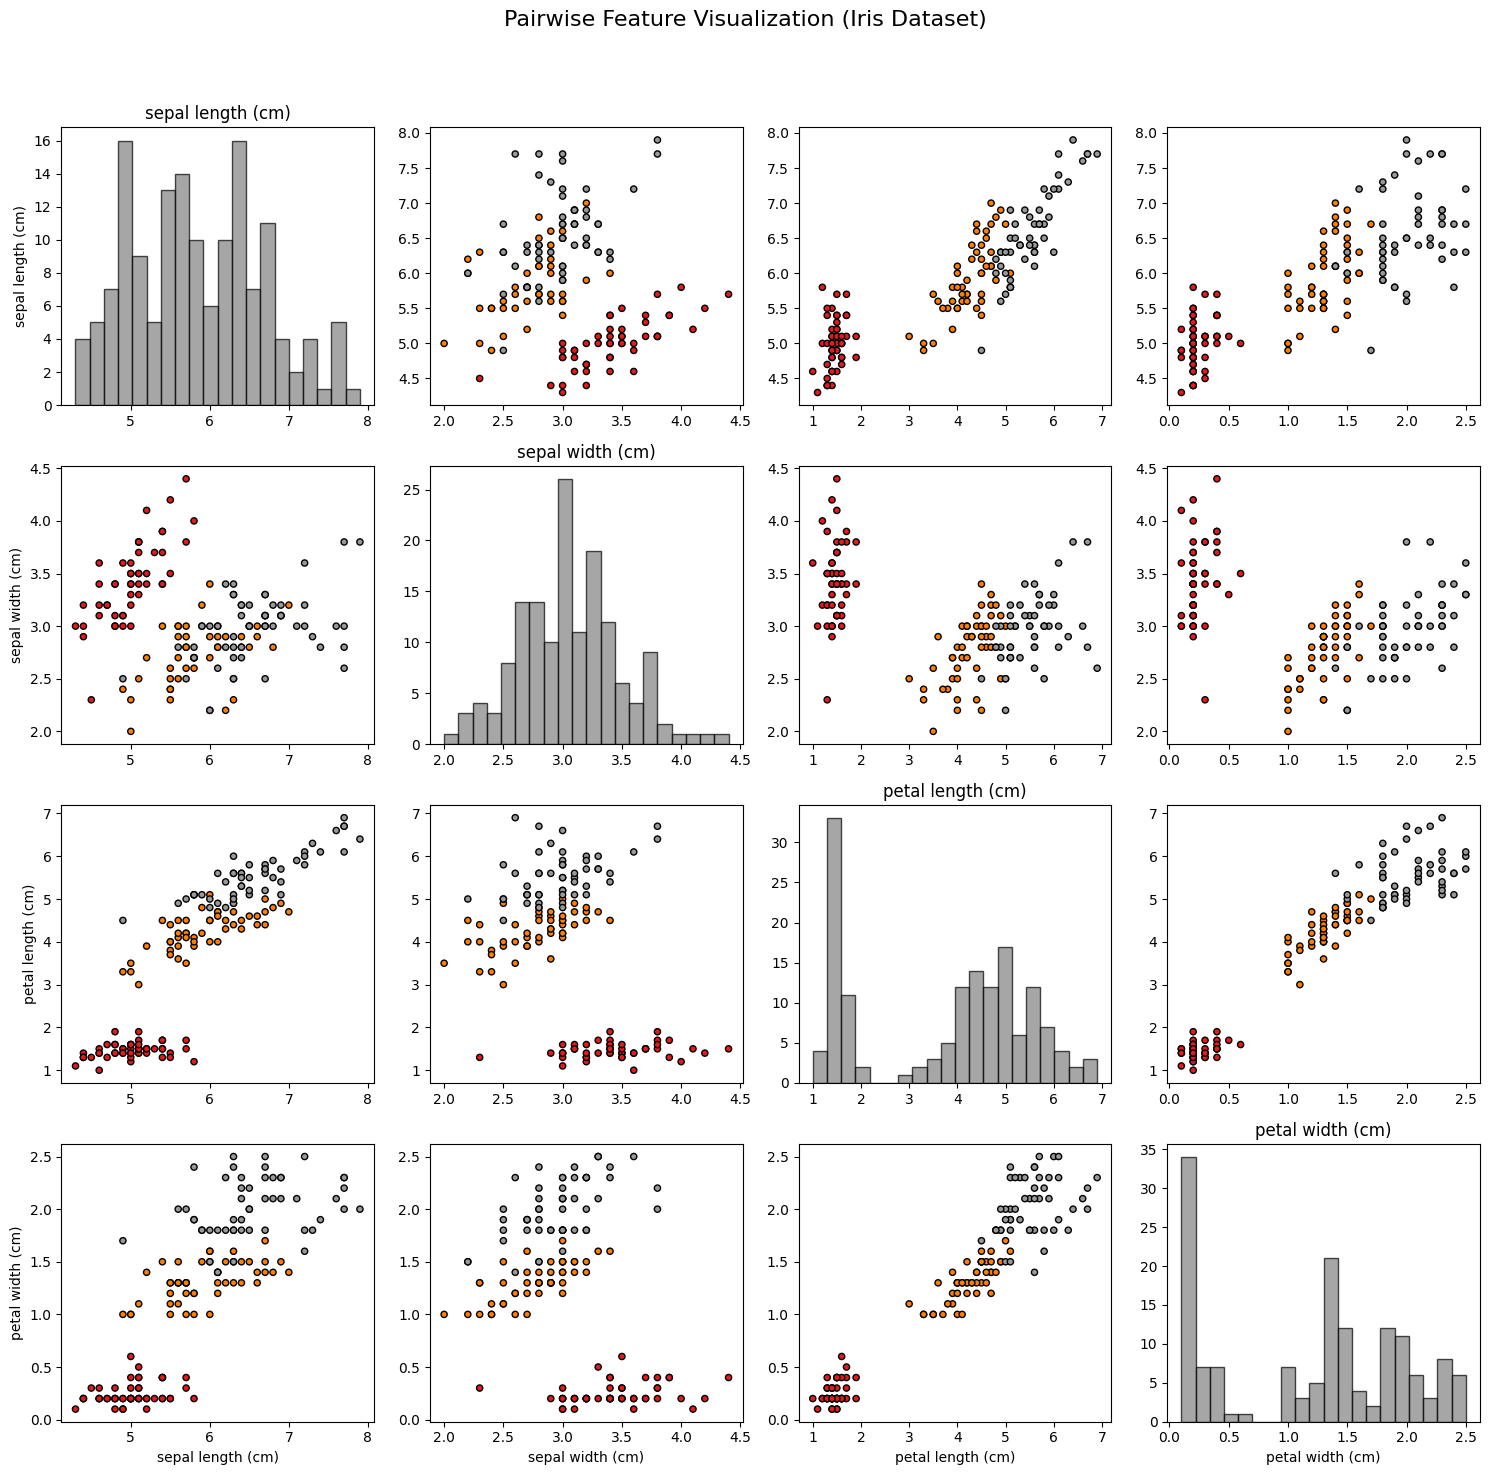

In [7]:
# Number of features
n_features = X.shape[1]

# Create a grid of subplots for all feature combinations
fig, axes = plt.subplots(n_features, n_features, figsize=(15, 15))
fig.suptitle("Pairwise Feature Visualization (Iris Dataset)", fontsize=16)

# Plot each pair of features
for i in range(n_features):
    for j in range(n_features):
        ax = axes[i, j]
        if i == j:
            # Diagonal: Histogram of a single feature
            ax.hist(X[:, i], bins=20, color='gray', edgecolor='black', alpha=0.7)
            ax.set_title(f"{feature_names[i]}")
        else:
            # Scatter plot for feature pairs
            scatter = ax.scatter(X[:, j], X[:, i], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
        if i == n_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Division

In [ ]:
# Pas de division car les données n'ont pas de label: aka on sait même pas à quelle classe elles appartiennent

## Model

In [3]:
# Appliquer K-means avec 3 clusters (le nombre de classes dans le dataset Iris)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

### Tests

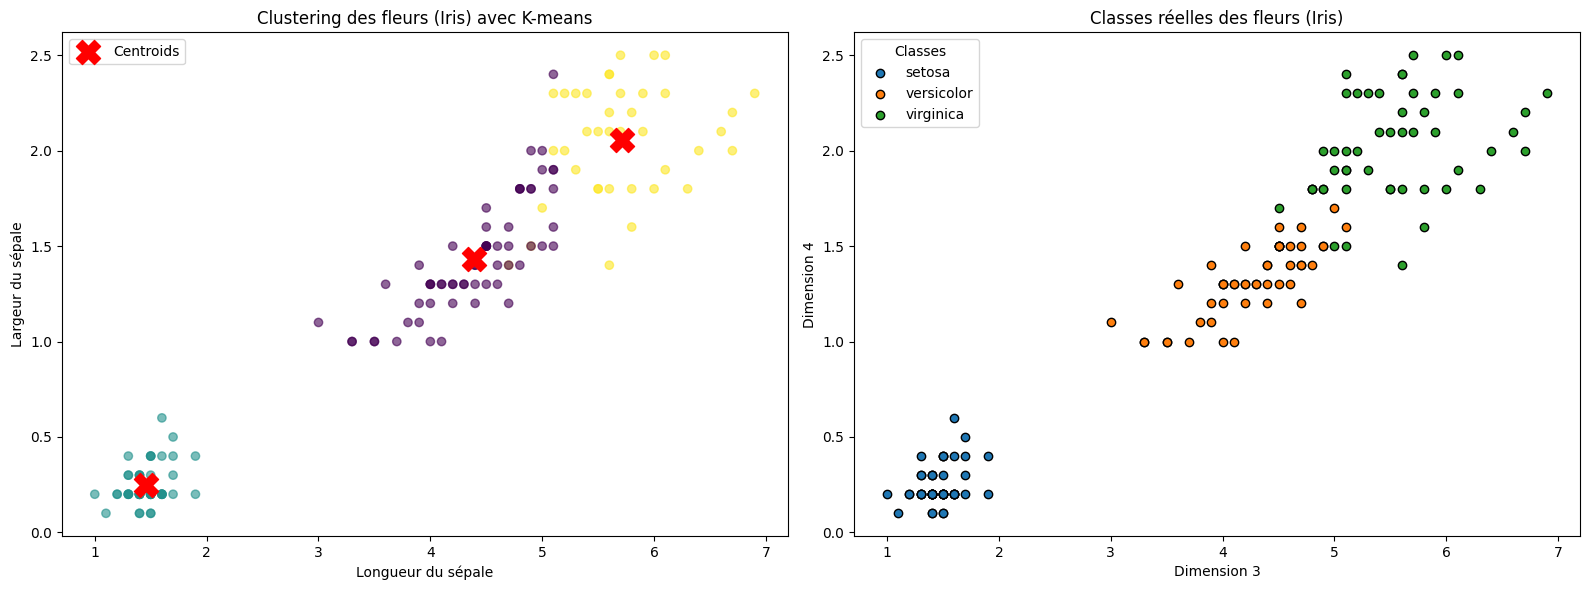

In [20]:
# Créer une figure avec deux sous-graphiques
feature_indices = (2, 3)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Premier graphique : Clustering des fleurs avec K-means
axes[0].scatter(X[:, feature_indices[0]], X[:, feature_indices[1]], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, feature_indices[0]], kmeans.cluster_centers_[:, feature_indices[1]], s=300, c='red', marker='X', label='Centroids')
axes[0].set_title('Clustering des fleurs (Iris) avec K-means')
axes[0].set_xlabel('Longueur du sépale')
axes[0].set_ylabel('Largeur du sépale')
axes[0].legend()

# Deuxième graphique : Visualisation des classes réelles
class_labels = iris.target_names
for class_index, class_label in enumerate(class_labels):
    axes[1].scatter(
        X[y == class_index, feature_indices[0]],
        X[y == class_index, feature_indices[1]],
        label=class_label,
        edgecolor='k',
    )
axes[1].set_xlabel(f"Dimension {feature_indices[0] + 1}")
axes[1].set_ylabel(f"Dimension {feature_indices[1] + 1}")
axes[1].set_title("Classes réelles des fleurs (Iris)")
axes[1].legend(title="Classes")

# Afficher les deux graphiques
plt.tight_layout()
plt.show()

#### Affichage des résultats

In [11]:
# Afficher les centres des clusters
print("Centroids des clusters : ")
print(kmeans.cluster_centers_)

# Afficher les étiquettes des clusters
print("Étiquettes des clusters : ")
print(kmeans.labels_)

Centroids des clusters : 
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Étiquettes des clusters : 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
